# Tarea - Ajuste de curvas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [22]:
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

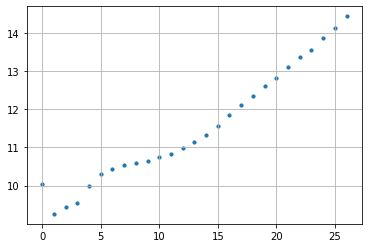

In [23]:
x = np.arange(0, 27)
y = data

plt.figure()
plt.scatter(x, y, s = 10)
plt.grid()

In [24]:
def funcion_costo_1(theta, x, y) :
    predicción = theta[1]*x + theta[0]
    error = y - predicción
    error2 = error**2
    return np.sum(error2)

theta_inicial_1 = np.random.rand(2)
solución = opt.minimize(funcion_costo_1,
                   theta_inicial_1,
                   args = (x, y))
costo_1 = solución.fun
resultados_1 = solución.x

resultados_1

array([9.1156764 , 0.18667055])

In [25]:
def funcion_costo_2(theta, x, y) :
    predicción = theta[2]*x**2 + theta[1]*x + theta[0]
    error = y - predicción 
    error2 = error**2
    return np.sum(error2)

theta_inicial_2 = np.random.rand(3)
solución = opt.minimize(funcion_costo_2,
                   theta_inicial_2,
                   args = (x, y))
costo_2 = solución.fun
resultados_2 = solución.x

resultados_2

array([9.59128645e+00, 7.25241276e-02, 4.39024721e-03])

In [26]:
def funcion_costo_3(theta, x, y) :
    predicción = theta[3]*x**3 + theta[2]*x**2 + theta[1]*x + theta[0]
    error = y - predicción 
    error2 = error**2
    return np.sum(error2)

theta_inicial_3 = np.random.rand(4)
solución = opt.minimize(funcion_costo_3,
                   theta_inicial_3,
                   args = (x, y))
costo_3 = solución.fun
resultados_3 = solución.x

resultados_3

array([9.56556697e+00, 8.52364708e-02, 3.15617678e-03, 3.15004507e-05])

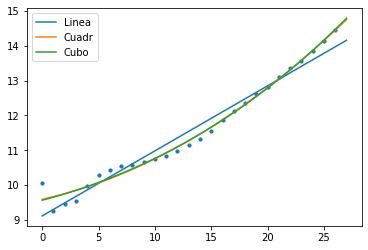

In [27]:
xn = np.linspace(0, 27, 200)
yn1 = resultados_1[0] + resultados_1[1]*xn
yn2 = resultados_2[0] + resultados_2[1]*xn + resultados_2[2]*xn**2
yn3 = resultados_3[0] + resultados_3[1]*xn + resultados_3[2]*xn**2 + resultados_3[3]*xn**3

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x, y, s = 10)
plt.plot(xn, yn1, label = "Linea")
plt.plot(xn, yn2, label = "Cuadr")
plt.plot(xn, yn3, label = "Cubo")
plt.legend(loc = "best")

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

In [28]:
data = pd.read_csv('population_data.csv')
data

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


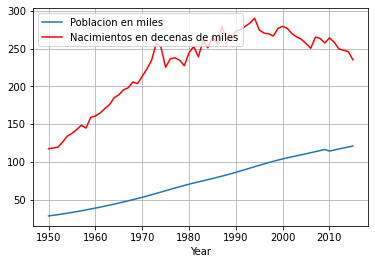

In [29]:
# Se muestra la gráfica. Vea como los datos son escalados, esto le ayudará en el cálculo
# de la regresión.

plt.plot(data.values[:,0],data.values[:,1]/1000,label=data.columns[1]+' en miles')
plt.plot(data.values[:,0],data.values[:,2]/10000,'r',label=data.columns[2]+' en decenas de miles')
plt.legend(loc=2)
plt.xlabel(data.columns[0])
plt.grid()

---

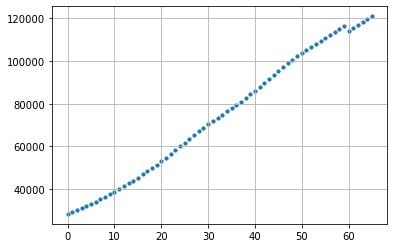

In [43]:
x = data["Year"] - 1950
y = data["Poblacion"]

plt.figure()
plt.scatter(x, y, s = 10)
plt.grid()

In [44]:
def funcion_población_1(theta, x, y) :
    predicción = theta[1]*x + theta[0]
    error = y - predicción
    error2 = error**2
    return np.sum(error2)

theta_inicial_1 = np.random.rand(2)
solución = opt.minimize(funcion_población_1,
                   theta_inicial_1,
                   args = (x, y))
población_1 = solución.fun
resultados_1 = solución.x

resultados_1

array([24138.02018633,  1543.97331262])

In [45]:
def funcion_población_2(theta, x, y) :
    predicción = theta[2]*x**2 + theta[1]*x + theta[0]
    error = y - predicción
    error2 = error**2
    return np.sum(error2)

theta_inicial_2 = np.random.rand(3)
solución = opt.minimize(funcion_población_2,
                   theta_inicial_2,
                   args = (x, y))
población_2 = solución.fun
resultados_2 = solución.x

resultados_2

array([2.44255891e+04, 1.51701323e+03, 4.14772750e-01])

In [46]:
def funcion_población_3(theta, x, y) :
    predicción = theta[3]*x**3 + theta[2]*x**2 + theta[1]*x + theta[0]
    error = y - predicción
    error2 = error**2
    return np.sum(error2)

theta_inicial_3 = np.random.rand(4)
solución = opt.minimize(funcion_población_3,
                   theta_inicial_3,
                   args = (x, y))
población_3 = solución.fun
resultados_3 = solución.x

resultados_3

array([ 2.84777739e+04,  7.39077125e+02,  3.05649352e+01, -3.09232435e-01])

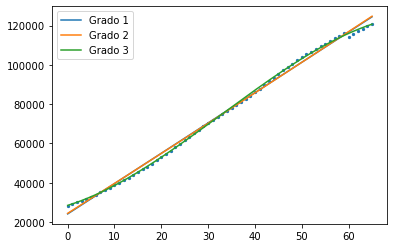

In [47]:
xn = np.linspace(0, 65, 1000)
yn1 = resultados_1[0] + resultados_1[1]*xn
yn2 = resultados_2[0] + resultados_2[1]*xn + resultados_2[2]*xn**2
yn3 = resultados_3[0] + resultados_3[1]*xn + resultados_3[2]*xn**2 + resultados_3[3]*xn**3

import matplotlib.pyplot as plt

plt.figure()

plt.scatter(x, y, s = 5)

plt.plot(xn, yn1, label = "Grado 1")
plt.plot(xn, yn2, label = "Grado 2")
plt.plot(xn, yn3, label = "Grado 3")

plt.legend(loc = "best")

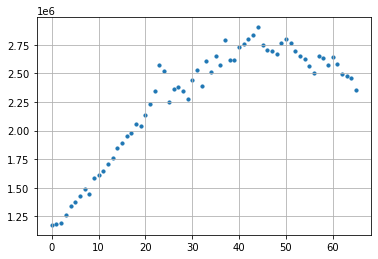

In [48]:
x = data["Year"] - 1950
y = data["Nacimientos"]

plt.figure()
plt.scatter(x, y, s = 10)
plt.grid()

In [49]:
def funcion_población_1(theta, x, y) :
    predicción = theta[1]*x + theta[0]
    error = y - predicción
    error2 = error**2
    return np.sum(error2)

theta_inicial_1 = np.random.rand(2)
solución = opt.minimize(funcion_población_1,
                   theta_inicial_1,
                   args = (x, y))
población_1 = solución.fun
resultados_1 = solución.x

resultados_1

array([1562834.8192728 ,   21983.01133637])

In [50]:
def funcion_población_2(theta, x, y) :
    predicción = theta[2]*x**2 + theta[1]*x + theta[0]
    error = y - predicción
    error2 = error**2
    return np.sum(error2)

theta_inicial_2 = np.random.rand(3)
solución = opt.minimize(funcion_población_2,
                   theta_inicial_2,
                   args = (x, y))
población_2 = solución.fun
resultados_2 = solución.x

resultados_2

array([ 1.02112243e+06,  7.27775899e+04, -7.81563365e+02])

In [51]:
def funcion_población_3(theta, x, y) :
    predicción = theta[3]*x**3 + theta[2]*x**2 + theta[1]*x + theta[0]
    error = y - predicción
    error2 = error**2
    return np.sum(error2)

theta_inicial_3 = np.random.rand(4)
solución = opt.minimize(funcion_población_3,
                   theta_inicial_3,
                   args = (x, y))
población_3 = solución.fun
resultados_3 = solución.x

resultados_3

array([ 1.08819486e+06,  5.98869812e+04, -2.81806863e+02, -5.12643989e+00])

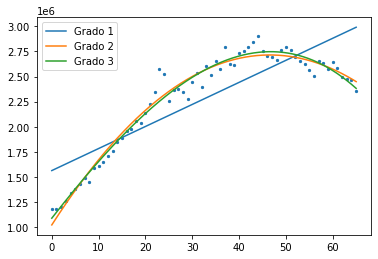

In [52]:
xn = np.linspace(0, 65, 1000)
yn1 = resultados_1[0] + resultados_1[1]*xn
yn2 = resultados_2[0] + resultados_2[1]*xn + resultados_2[2]*xn**2
yn3 = resultados_3[0] + resultados_3[1]*xn + resultados_3[2]*xn**2 + resultados_3[3]*xn**3

import matplotlib.pyplot as plt

plt.figure()

plt.scatter(x, y, s = 5)

plt.plot(xn, yn1, label = "Grado 1")
plt.plot(xn, yn2, label = "Grado 2")
plt.plot(xn, yn3, label = "Grado 3")

plt.legend(loc = "best")